In [5]:
import numpy as np

## Importar dataset

In [6]:
def carregar_imatges(ruta):
    with open(ruta, 'rb') as f:
        dades = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return dades.reshape(-1, 28, 28)

def carregar_etiquetes(ruta):
    with open(ruta, 'rb') as f:
        dades = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return dades

X_train = carregar_imatges("train-images.idx3-ubyte")
y_train = carregar_etiquetes("train-labels.idx1-ubyte")
X_test = carregar_imatges("t10k-images.idx3-ubyte")
y_test = carregar_etiquetes("t10k-labels.idx1-ubyte")

### Mostrar imatges del dataset

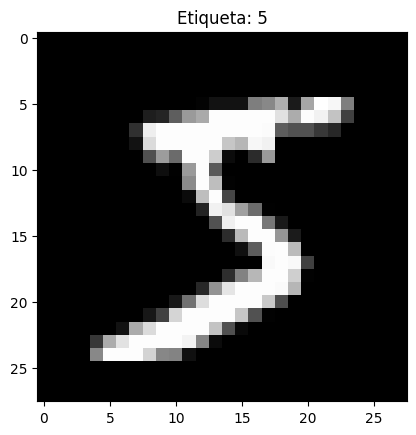

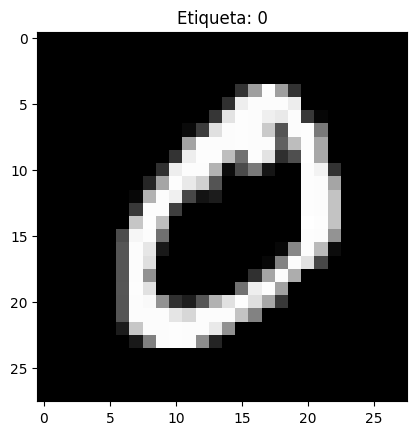

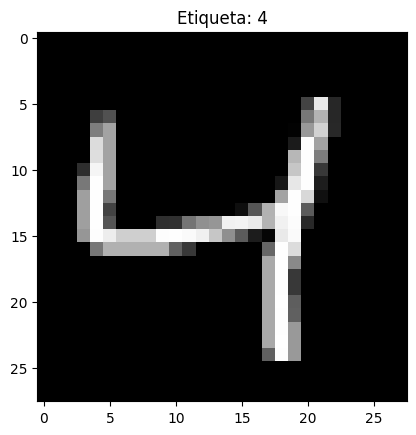

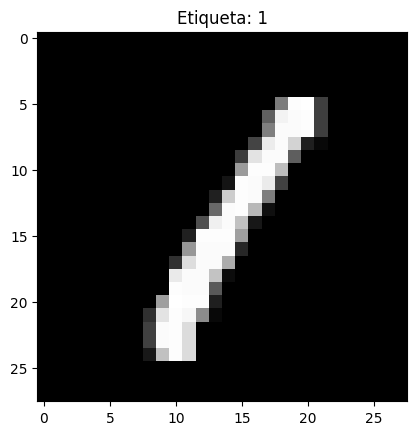

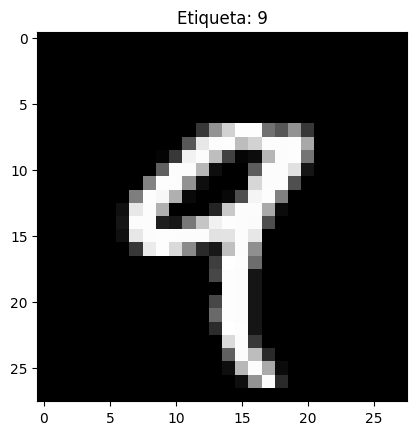

In [7]:
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes de entrenamiento
for i in range(5):
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.show()

In [8]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y [np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# def backward_prop(N1, Z1, N2, Z2, W1, W2, X, Y):
#     m = Z2.shape[1]
#     one_hot_Y = one_hot(Y)
#     dN2 = 2 * (Z2 - one_hot_Y)
#     dW2 = dN2.dot(Z1.T)/m
#     dB2 = np.sum(dN2,1)/m
#     dN1 = W2.T.dot(N2) * de_Relu(N1)
#     dW1 = dN1.dot(X.T)/m
#     dB1 = np.sum(dN1,1)/m

#     return dW1, dB1, dW2, dB2

def accuracy(predict, expected):
    return np.sum(predict == expected) / expected.size

    
class linear_layer():
    def __init__(self, input_dimensions, output_dimensions):
        self.W = 2 * np.random.rand(input_dimensions, output_dimensions) - 1
        self.B = np.random.rand(1, output_dimensions)

    def forward(self, x):
        return x @ self.W + self.B
    
    def backward(self, error):
        self.dW = error @ self.x
        self.dB = error.sum(axis = 0)
        return error @ self.W

    def update_parameters(self, lr):
        self.W = self.W - lr * self.dW
        self.B = self.B - lr * self.dB


## Definir capes d'activació i input

In [9]:
class Relu_layer():
    def __init__(self):
        pass

    def forward(self, x):
        self.Z = np.maximum(0, x)
        return self.Z
    
    def backward(self, error):
        return error * (self.Z > 0)
    

class input_layer():
    def __init__(self, input_size):
        self.input_size = input_size

    def forward(self, x):
        return x
    
    def backward(self, error):
        return error
    
    def update_parameters(self, ir):
        pass

## Model de xarxa neuronal

In [ ]:
class NN_model():
    def __init__(self):
        self.sequential = [input_layer(4),
                           linear_layer(4,4),
                           Relu_layer(),
                           linear_layer(2,2)]
    
    def forward(self, x):
        for layer in self.sequential:
            y = layer.forward(x)
            x = y
        return y
    
    def backward(self, error):
        for layer in self.sequential:
            y = layer.backward(error)
            error = y
        return error
    
    def update_parameters(self, learning_rate=0.03):
        for layer in self.sequential:
            layer.update_parameters(learning_rate)
    
model = NN_model()

y_pred = model.forward(np.array([1, -10, 1, -8]))
print(y_pred)
y_real = np.array([1,0])
error = 2 * np.abs(y_pred - y_real)
model.backward(error)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

## Train test loops

In [ ]:
def train(model, x, y):
    for batch in x,y:
        yp = model.forward(batch)
        error = (y-yp) * (y-yp)
        model.backward(error)
        model.update(lr = 0.03)
    
    for epoch in epochs:
        train(model, x_train, y_train)
        test(model, x_train, y_train)
        